## IMPORTACION

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch

## CARGA DEL DATASET TRAIN Y EL TEST

In [ ]:
data_train = datasets.CIFAR10(
    root='datos',
    train=True,
    download=True,
    transform=ToTensor()
)

data_test = datasets.CIFAR10(
    root='datos',
    train=False,
    download=True,
    transform=ToTensor()
)

print("datos de entrenamiento",data_train)
print("datos de test",data_test)

100%|██████████| 170M/170M [00:04<00:00, 41.6MB/s]


datos de entrenamiento Dataset CIFAR10
    Number of datapoints: 50000
    Root location: datos
    Split: Train
    StandardTransform
Transform: ToTensor()
datos de test Dataset CIFAR10
    Number of datapoints: 10000
    Root location: datos
    Split: Test
    StandardTransform
Transform: ToTensor()


## VISUALIZACION DE PRUEBA DE LAS IMAGENES CON SIS CLASES

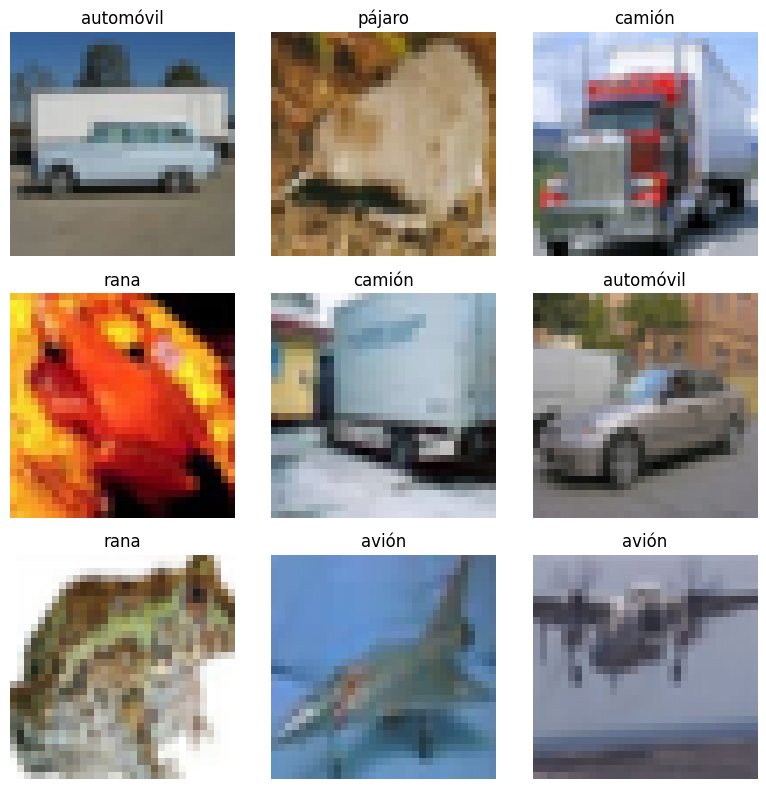

tipo de dato: <class 'torch.Tensor'>
tamaño de la imagen: torch.Size([32, 32, 3])


In [ ]:

classes = ('avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
           'perro', 'rana', 'caballo', 'barco', 'camión')

figure = plt.figure(figsize=(8, 8))
fils, cols = 3, 3

for i in range(1, fils * cols + 1):
    idx = torch.randint(0, len(data_train), (1,)).item()
    img, label = data_train[idx]

    ax = figure.add_subplot(fils, cols, i)

    ax.set_title(classes[label])
    ax.axis('off')

    img = img.permute(1, 2, 0)
    ax.imshow(img)

plt.tight_layout()
plt.show()

#caracteristicas de las imagenes
print(f"tipo de dato: {type(img)}")
print(f"tamaño de la imagen: {img.shape}")


## DIVICION DEL DATASET , CREACION DE LOADERS

In [ ]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=64, shuffle=False)

print(f"entrenamiento: {len(data_train)} imágenes")
print(f"prueba: {len(data_test)} imágenes")

entrenamiento: 50000 imágenes
prueba: 10000 imágenes


## CLADE DE LA RED NEURONAL

In [ ]:
class RedNeuronal(torch.nn.Module):
    # constructor
    def __init__(self, D_in, H1, H2, H3, D_out):

        super(RedNeuronal, self).__init__()

        self.fc1 = torch.nn.Linear(D_in, H1)
        self.relu1 = torch.nn.ReLU()

        self.fc2 = torch.nn.Linear(H1, H2)
        self.relu2 = torch.nn.ReLU()

        self.fc3 = torch.nn.Linear(H2, H3)
        self.relu3 = torch.nn.ReLU()


        self.fc4 = torch.nn.Linear(H3, D_out)


    def forward(self, x):

        x = self.fc1(x)
        x = self.relu1(x)

        x = self.fc2(x)
        x = self.relu2(x)

        x = self.fc3(x)
        x = self.relu3(x)

        x = self.fc4(x)
        return x


In [26]:
import numpy as np
D_in, H1, H2, H3, D_out = 3072, 512, 256, 128, 10
model = RedNeuronal(D_in, H1, H2, H3, D_out)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
log_each = 5
losses = []
train_accuracies = []
test_accuracies = []


In [28]:
def calculate_presi(model, data_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [ ]:
# Entrenar el modelo
for e in range(1, epochs+1):
    model.train()
    epoch_losses = []

    for images, labels in train_loader:
        images = images.view(images.size(0), -1)

        y_pred = model(images)

        loss = criterion(y_pred, labels)
        epoch_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_loss)

    # Calcular precisión en entrenamiento y prueba
    train_acc = calculate_presi(model, train_loader)
    train_accuracies.append(train_acc)

    test_acc = calculate_presi(model, test_loader)
    test_accuracies.append(test_acc)

    if not e % log_each:
        print(f"Epoch {e}/{epochs} | Loss: {avg_loss:.5f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")


# evalua el modelo
def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    return all_preds, all_labels


preds, labels = evaluate(model, test_loader)
accuracy = sum(np.array(preds) == np.array(labels)) / len(labels)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")




Epoch 5/100 | Loss: 1.49167 | Train Acc: 0.4715 | Test Acc: 0.4631
Epoch 10/100 | Loss: 1.34387 | Train Acc: 0.5366 | Test Acc: 0.5034
Epoch 15/100 | Loss: 1.23657 | Train Acc: 0.5517 | Test Acc: 0.4924
Epoch 20/100 | Loss: 1.14888 | Train Acc: 0.5896 | Test Acc: 0.5022


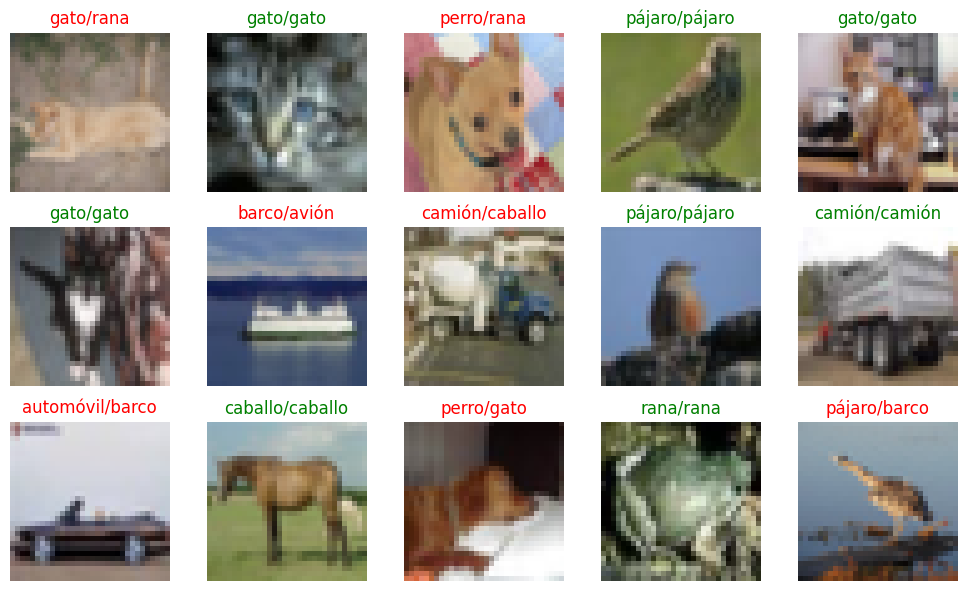

In [ ]:
import random
import matplotlib.pyplot as plt

# Obtener datos de test
X_test = torch.cat([images for images, _ in test_loader])
y_test = torch.cat([labels for _, labels in test_loader]).numpy()

# Clases de CIFAR-10
classes = ('avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
           'perro', 'rana', 'caballo', 'barco', 'camión')

# Visualización
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
model = model.cpu()

for i in range(r*c):
    plt.subplot(r, c, i+1)
    ix = random.randint(0, len(X_test)-1)
    img = X_test[ix]

    # Predecir
    output = model(img.view(1, -1))
    y_pred = output.max(1)[1].item()

    # Mostrar imagen y resultados
    plt.imshow(img.permute(1, 2, 0))
    plt.axis("off")
    real_class, pred_class = classes[y_test[ix]], classes[y_pred]
    plt.title(f"{real_class}/{pred_class}",
             color="green" if y_test[ix] == y_pred else "red")

plt.tight_layout()
plt.show()


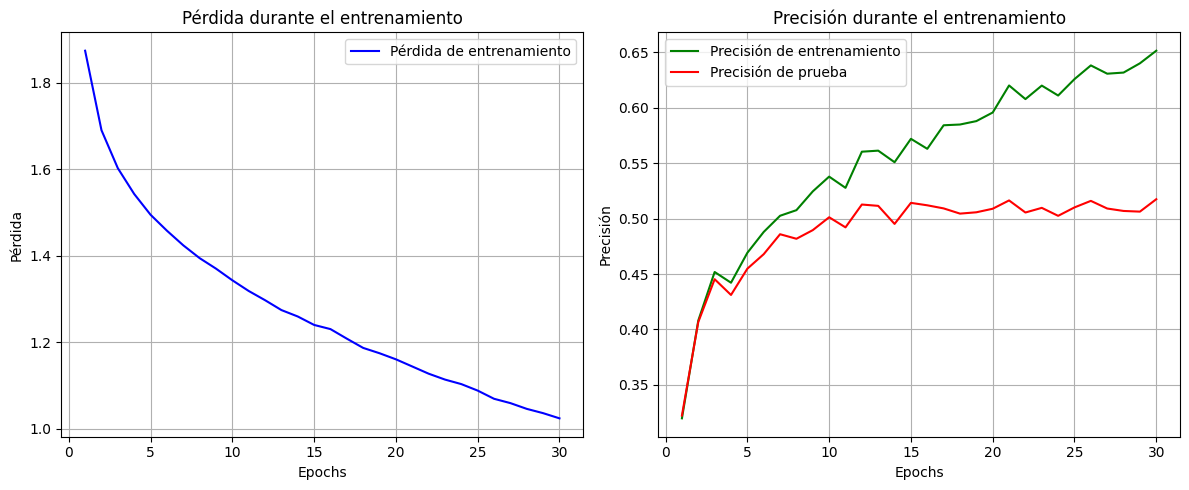

Pérdida final: 1.0239
Precisión final de entrenamiento: 0.6515
Precisión final de prueba: 0.5175


In [25]:

import matplotlib.pyplot as plt
import numpy as np

# Crear gráficas de las pérdidas y precisión
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses, 'b-', label='Pérdida de entrenamiento')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, 'g-', label='Precisión de entrenamiento')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, 'r-', label='Precisión de prueba')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar los valores finales
print(f"Pérdida final: {losses[-1]:.4f}")
print(f"Precisión final de entrenamiento: {train_accuracies[-1]:.4f}")
print(f"Precisión final de prueba: {test_accuracies[-1]:.4f}")